# AGS 4

Jupyter Notebook example working with .ags data

## Install AGS4 pip package

In [21]:
# Install AGS pip package
import sys
!{sys.executable} -m pip install python-ags4 geopandas descartes

## Import Module

In [12]:
from python_ags4 import AGS4
import toml
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

## Import data from an AGS4 file:


- tables is a dictionary of Pandas DataFrames. Each DataFrame contains the data from a GROUP in the AGS4 file.
- headings is a dictionary of lists. Each list has the header names of the corresponding GROUP

In [13]:
tables, headings = AGS4.AGS4_to_dataframe('./tests/test_data.ags')

All data are imported as text so they cannot be analyzed or plotted immediately. You can use the `AGS4.convert_to_numeric()` function to convert all the numerical data in a DataFrame from text to numeric.

The `AGS4.convert_to_numeric()` function automatically converts all columns in the input DataFrame with the a numeric TYPE to a float. (Note: The UNIT and TYPE rows are removed during this operation as they are non-numeric.)

In [14]:
LOCA = AGS4.convert_to_numeric(tables['LOCA'])

In [15]:
LOCA

,HEADING,LOCA_ID,LOCA_TYPE,LOCA_STAT,LOCA_NATE,LOCA_NATN,LOCA_GREF,LOCA_REM,LOCA_FDEP,LOCA_STAR,LOCA_PURP,LOCA_TERM,LOCA_ENDD
0,DATA,Location_1,Boring,Draft,100000.01,5000000.2,,,50.11,2019-01-01,Geotechnical Investigation,,2019-01-01
1,DATA,Location_2,Boring,Draft,101000.01,5000000.2,,,50.22,2019-01-07,Geotechnical Investigation,,2019-01-07
2,DATA,Location_3,Boring,Draft,102000.01,5000000.2,,,50.33,2019-01-14,Geotechnical Investigation,,2019-01-14
3,DATA,Location_4,Boring,Draft,103000.01,5000000.2,,,50.44,2019-01-21,Geotechnical Investigation,,2019-01-21


## Map Locations

Plot locations using Geopandas

In [24]:
gdf = geopandas.GeoDataFrame(LOCA, geometry=geopandas.points_from_xy(LOCA.LOCA_NATE, LOCA.LOCA_NATN))

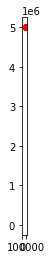

In [25]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world.plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()
